# Segmenter des clients d'un site de e-commerce

## Importation des librairies et données

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_translation = pd.read_csv('product_category_name_translation.csv')

## Regroupement des informations et nettoyage
L'objectif de cette partie est de regrouper nos 9 datasets en un seul qui soit centré sur les clients. Nous allons donc, étape par étape, tout ramener au client afin de disposer d'un dataset complet sur leurs comportements. 

In [4]:
print(customers.shape)
customers.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
print(geolocation.shape)
geolocation.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
print(order_items.shape)
order_items.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
print(order_payments.shape)
order_payments.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
print(order_reviews.shape)
order_reviews.head()

(100000, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
print(orders.shape)
orders.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
print(products.shape)
products.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
print(sellers.shape)
sellers.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
print(product_category_translation.shape)
product_category_translation.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Après avoir visualisé chaque dataframe, nous devont désormais penser à ce dont nous avons besoin pour établir une ségmentation. 

Tout d'abord nous avons besoins de regrouper toutes ces informations selon le client, qui est la feature que nous voulons ségmenter. 
Nous allons donc transformer notre dataset afin de regrouper toutes les variables intéressantes sur un même dataframe, en fonction des clients (ici *customer_id*). 

Nous ciblons ici 3 grands groupes d'information : **produits, commandes & clients**. Commençons par regrouper les données par groupes.

### Produits

Nous allons tout de suite ajouter la traduction anglaise de la catégorie de produits au df **products**.

In [13]:
products_data = pd.merge(products, product_category_translation , on = 'product_category_name', how='left')
print(products_data.shape)
products_data.head()

(32951, 10)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Créons désormais notre df **products_global** et ajoutons-y les infos principales :

In [14]:
products_global = products_data[['product_id','product_category_name_english','product_photos_qty','product_weight_g']]

In [15]:
print(products_global.shape)
products_global.head()

(32951, 4)


,product_id,product_category_name_english,product_photos_qty,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,1.0,225.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1.0,1000.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,1.0,154.0
3,cef67bcfe19066a932b7673e239eb23d,baby,1.0,371.0
4,9dc1a7de274444849c219cff195d0b71,housewares,4.0,625.0


Notre df **products_global** est prêt, passons au suivant.

### Commandes

Nous avons pour les commandes 4 jeux de données: infos générales de la commande, infos paiement, produits dans la commande et avis laissé sur celle-ci. Essayons de tout regrouper par commande. 

En premier lieu nous ajountons les infos de paiment :

In [16]:
orders_and_payments = orders.merge(order_payments, on ='order_id', how='left')
print(orders_and_payments.shape)
orders_and_payments.head()

(103887, 12)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12


Puis nous ajoutons les avis clients :

In [17]:
orders_and_payments_and_reviews = pd.merge(orders_and_payments, order_reviews, on='order_id', how='left') 
print(orders_and_payments_and_reviews.shape)
orders_and_payments_and_reviews.head() 

(104486, 18)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


Afin de relier les produits aux commandes, nous allons regrouper nos df **order_items & products_global** sous un nouveau df **products_orders**.

In [18]:
products_orders = pd.merge(order_items , products_global, on='product_id', how='left')
print(products_orders.shape)
products_orders.head()

(112650, 10)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_photos_qty,product_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,4.0,650.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,2.0,30000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,2.0,3050.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,1.0,200.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,1.0,3750.0


In [19]:
products_orders_2 = pd.merge(products_orders , orders[['order_id','customer_id']], on='order_id', how='left')
print(products_orders_2.shape)
products_orders_2.sort_values('customer_id')

(112650, 11)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_photos_qty,product_weight_g,customer_id
41909,5f79b5b0931d63f1a42989eb65b9da6e,1,64315bd8c0c47303179dd2e25b579d00,7aa4334be125fcdd2ba64b3180029f14,2017-11-21 16:35:32,89.80,24.94,toys,1.0,4267.0,00012a2ce6f8dcda20d059ce98491703
72017,a44895d095d7e0702b6a162fa2dbeced,1,84183944dc7cddca87a5d384452c1d3c,2a1348e9addc1af5aaa619b1a3679d6b,2017-07-20 09:55:12,54.90,12.51,health_beauty,2.0,150.0,000161a058600d5901f007fab4c27140
21608,316a104623542e4d75189bb372bc5f8d,1,9df2b21ec85378d71df4404712e17478,46dc3b2cc0980fb8ec44634e21d2718e,2017-03-06 11:15:20,179.99,15.43,baby,2.0,750.0,0001fd6190edaaf884bcaf3d49edf079
38788,5825ce2e88d5346438686b0bba99e5ee,1,af3ec22cce878225aae6d9eb6c7a78eb,aafe36600ce604f205b86b5084d3d767,2017-08-23 03:10:27,149.90,29.45,cool_stuff,1.0,1600.0,0002414f95344307404f0ace7a26f1d5
4747,0ab7fb08086d4af9141453c91878ed7a,1,868b3136c5b206f91b8208fbfdf2cb7c,4a3ca9315b744ce9f8e9374361493884,2018-04-10 03:10:19,93.00,14.01,bed_bath_table,2.0,800.0,000379cdec625522490c315e70c7a9fb
...,...,...,...,...,...,...,...,...,...,...,...
56848,814d6a3a7c0b32b2ad929ac6328124e9,1,c045b19fdb30a3035c56d04c6fe2e622,259f7b5e6e482c230e5bfaa670b6bb8f,2018-04-04 17:10:27,54.90,26.46,bed_bath_table,3.0,2050.0,fffecc9f79fd8c764f843e9951b11341
61616,8c855550908247a7eff50281b92167a8,1,d5c263f4d651ba657c900ce70a4be7de,dd55f1bb788714a40e7954c3be6df745,2018-05-28 13:54:37,47.90,15.23,telephony,4.0,350.0,fffeda5b6d849fbd39689bb92087f431
57875,83b5fc912b2862c5046555ded1483ae9,1,e61c78a7343d82c0539d27df0f7dfc31,da8622b14eb17ae2831f4ac5b9dab84a,2018-06-15 17:20:23,199.90,14.23,bed_bath_table,1.0,2700.0,ffff42319e9b2d713724ae527742af25
92051,d0e7be325a1c986babc4e1cdb91edc03,1,43ee88561093499d9e571d4db5f20b79,23613d49c3ac2bd302259e55c06c050c,2017-09-08 12:05:40,10.90,11.85,furniture_decor,3.0,200.0,ffffa3172527f765de70084a7e53aae8


In [20]:
products_orders_2.product_category_name_english.unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto', nan,
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'c

In [21]:
products_orders_2.product_category_name_english.loc[products_orders_2.product_category_name_english == 'cool_stuff'].count()

3796

Après avoir regroupé des données, essayons désormais de tout rassembler au client. 

### Clients

Regardons les deux variables **id** présent dans **customers**.

In [22]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
pd.unique(customers.customer_unique_id).shape

(96096,)

In [24]:
pd.unique(customers.customer_id).shape

(99441,)

Nous observons que certains clients ont plusieur **customer_id** et qu'il faudra donc regrouper le tout sous **customer_unique_id** par la suite.

Nous allons maintenant définir le nombre de commandes par client, le prix moyen de commande, le nombre d'avis déposés, la note moyenne des avis, le nombre de produits achetés ainsi le prix moyen du produit.

In [25]:
nb_orders = orders[['order_id','customer_id']].groupby(['customer_id']).count().values
nb_orders.shape

(99441, 1)

In [26]:
nb_reviews = orders_and_payments_and_reviews[['review_id','customer_id']].groupby(['customer_id']).count().values
nb_reviews.shape

(99441, 1)

In [27]:
recency_order = orders_and_payments_and_reviews[['order_approved_at','customer_id']].groupby(['customer_id']).max().values
recency_order.shape

(99441, 1)

In [28]:
avg_orders_price = orders_and_payments_and_reviews[['payment_value','review_score','payment_installments','customer_id']].groupby(['customer_id']).mean().values
avg_orders_price.shape

(99441, 3)

In [29]:
nb_products = products_orders_2[['customer_id','order_item_id']].groupby(['customer_id']).sum()
nb_products.shape

(98666, 1)

In [30]:
avg_products_price = products_orders_2[['customer_id','price','freight_value','product_photos_qty','product_weight_g']].groupby(['customer_id']).mean()
avg_products_price.shape

(98666, 4)

Il est temps maintenant d'ajouter ces nouvelles variables à notre df **customers**.

In [31]:
customers = customers.sort_values('customer_id')

In [32]:
customers['nb_orders'] = nb_orders
customers['nb_reviews'] = nb_reviews
customers['recency_order'] = recency_order
customers['avg_orders_price'] = avg_orders_price[:,0]
customers['avg_review_score'] = avg_orders_price[:,1]
customers['payment_installments'] = avg_orders_price[:,2]

customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nb_orders,nb_reviews,recency_order,avg_orders_price,avg_review_score,payment_installments
84790,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,1,1,2017-11-14 16:35:32,114.74,1.0,8.0
27335,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,1,1,2017-07-16 09:55:12,67.41,4.0,5.0
63792,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,1,1,2017-02-28 11:15:20,195.42,5.0,10.0
97756,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,1,1,2017-08-17 03:10:27,179.35,5.0,1.0
59921,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,1,1,2018-04-04 03:10:19,107.01,4.0,1.0


In [33]:
customers_global = customers.merge(nb_products, on='customer_id', how='left').merge(avg_products_price, on='customer_id', how='left')
customers_global = customers_global.rename(columns={"price":"avg_product_price",
                                                    "freight_value":"avg_freight_value"})
print(customers_global.shape)
customers_global.head()

(99441, 16)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nb_orders,nb_reviews,recency_order,avg_orders_price,avg_review_score,payment_installments,order_item_id,avg_product_price,avg_freight_value,product_photos_qty,product_weight_g
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,1,1,2017-11-14 16:35:32,114.74,1.0,8.0,1.0,89.80,24.94,1.0,4267.0
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,1,1,2017-07-16 09:55:12,67.41,4.0,5.0,1.0,54.90,12.51,2.0,150.0
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,1,1,2017-02-28 11:15:20,195.42,5.0,10.0,1.0,179.99,15.43,2.0,750.0
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,1,1,2017-08-17 03:10:27,179.35,5.0,1.0,1.0,149.90,29.45,1.0,1600.0
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,1,1,2018-04-04 03:10:19,107.01,4.0,1.0,1.0,93.00,14.01,2.0,800.0


Maintenant que nous avons les infos sur les commandes et produits, il nous reste à ajouter les catégories de produits achetés. Nous allons utiliser pour cela la méthode *get_dummies* de Pandas, puis ensuite faire une jointure avec notre dataset **customers_global**.

In [34]:
product_cat = pd.get_dummies(products_orders_2[['product_category_name_english']], prefix='')
print(product_cat.shape)
product_cat

(112650, 71)


,_agro_industry_and_commerce,_air_conditioning,_art,_arts_and_craftmanship,_audio,_auto,_baby,_bed_bath_table,_books_general_interest,_books_imported,...,_security_and_services,_signaling_and_security,_small_appliances,_small_appliances_home_oven_and_coffee,_sports_leisure,_stationery,_tablets_printing_image,_telephony,_toys,_watches_gifts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
112648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
product_cat_customers = pd.concat([products_orders_2,product_cat], axis=1)
print(product_cat_customers.shape)
product_cat_customers

(112650, 82)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_photos_qty,product_weight_g,...,_security_and_services,_signaling_and_security,_small_appliances,_small_appliances_home_oven_and_coffee,_sports_leisure,_stationery,_tablets_printing_image,_telephony,_toys,_watches_gifts
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,4.0,650.0,...,0,0,0,0,0,0,0,0,0,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,2.0,30000.0,...,0,0,0,0,0,0,0,0,0,0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,2.0,3050.0,...,0,0,0,0,0,0,0,0,0,0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,1.0,200.0,...,0,0,0,0,0,0,0,0,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,1.0,3750.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,3.0,10150.0,...,0,0,0,0,0,0,0,0,0,0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,1.0,8950.0,...,0,0,0,0,0,0,0,0,0,0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,1.0,967.0,...,0,0,0,0,1,0,0,0,0,0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,1.0,100.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
product_cat_customers.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name_english', 'product_photos_qty',
       'product_weight_g', 'customer_id', '_agro_industry_and_commerce',
       '_air_conditioning', '_art', '_arts_and_craftmanship', '_audio',
       '_auto', '_baby', '_bed_bath_table', '_books_general_interest',
       '_books_imported', '_books_technical', '_cds_dvds_musicals',
       '_christmas_supplies', '_cine_photo', '_computers',
       '_computers_accessories', '_consoles_games',
       '_construction_tools_construction', '_construction_tools_lights',
       '_construction_tools_safety', '_cool_stuff',
       '_costruction_tools_garden', '_costruction_tools_tools',
       '_diapers_and_hygiene', '_drinks', '_dvds_blu_ray', '_electronics',
       '_fashio_female_clothing', '_fashion_bags_accessories',
       '_fashion_childrens_clothes', '_fashion_male_clothing',
       '_fashion_shoes', '_fashion

In [37]:
customers_products = product_cat_customers[['customer_id',
                                           '_agro_industry_and_commerce', '_air_conditioning', '_art',
                                           '_arts_and_craftmanship', '_audio', '_auto', '_baby', '_bed_bath_table',
                                           '_books_general_interest', '_books_imported', '_books_technical',
                                           '_cds_dvds_musicals', '_christmas_supplies', '_cine_photo',
                                           '_computers', '_computers_accessories', '_consoles_games',
                                           '_construction_tools_construction', '_construction_tools_lights',
                                           '_construction_tools_safety', '_cool_stuff',
                                           '_costruction_tools_garden', '_costruction_tools_tools',
                                           '_diapers_and_hygiene', '_drinks', '_dvds_blu_ray', '_electronics',
                                           '_fashio_female_clothing', '_fashion_bags_accessories',
                                           '_fashion_childrens_clothes', '_fashion_male_clothing',
                                           '_fashion_shoes', '_fashion_sport', '_fashion_underwear_beach',
                                           '_fixed_telephony', '_flowers', '_food', '_food_drink',
                                           '_furniture_bedroom', '_furniture_decor', '_furniture_living_room',
                                           '_furniture_mattress_and_upholstery', '_garden_tools', '_health_beauty',
                                           '_home_appliances', '_home_appliances_2', '_home_comfort_2',
                                           '_home_confort', '_home_construction', '_housewares',
                                           '_industry_commerce_and_business',
                                           '_kitchen_dining_laundry_garden_furniture', '_la_cuisine',
                                           '_luggage_accessories', '_market_place', '_music',
                                           '_musical_instruments', '_office_furniture', '_party_supplies',
                                           '_perfumery', '_pet_shop', '_security_and_services',
                                           '_signaling_and_security', '_small_appliances',
                                           '_small_appliances_home_oven_and_coffee', '_sports_leisure',
                                           '_stationery', '_tablets_printing_image', '_telephony', '_toys',
                                           '_watches_gifts']].groupby(['customer_id']).sum()
print(customers_products.shape)
customers_products.head()

(98666, 71)


,_agro_industry_and_commerce,_air_conditioning,_art,_arts_and_craftmanship,_audio,_auto,_baby,_bed_bath_table,_books_general_interest,_books_imported,...,_security_and_services,_signaling_and_security,_small_appliances,_small_appliances_home_oven_and_coffee,_sports_leisure,_stationery,_tablets_printing_image,_telephony,_toys,_watches_gifts
customer_id,,,,,,,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
000161a058600d5901f007fab4c27140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001fd6190edaaf884bcaf3d49edf079,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002414f95344307404f0ace7a26f1d5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000379cdec625522490c315e70c7a9fb,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
final_customers_df = customers_global.merge(customers_products, on='customer_id', how='left')
print(final_customers_df.shape)
final_customers_df

(99441, 87)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nb_orders,nb_reviews,recency_order,avg_orders_price,avg_review_score,...,_security_and_services,_signaling_and_security,_small_appliances,_small_appliances_home_oven_and_coffee,_sports_leisure,_stationery,_tablets_printing_image,_telephony,_toys,_watches_gifts
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,1,1,2017-11-14 16:35:32,114.74,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,1,1,2017-07-16 09:55:12,67.41,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,1,1,2017-02-28 11:15:20,195.42,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,1,1,2017-08-17 03:10:27,179.35,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,1,1,2018-04-04 03:10:19,107.01,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,e5794df8573fa179a90a7b797fc4b71f,95630,parobe,RS,1,3,2018-03-29 17:10:27,27.12,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99437,fffeda5b6d849fbd39689bb92087f431,afbb5a642107cf6bb1ca68e863175f03,22461,rio de janeiro,RJ,1,1,2018-05-22 13:54:37,63.13,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99438,ffff42319e9b2d713724ae527742af25,680213db6ebd9e4f24d03280cbe10346,6754,taboao da serra,SP,1,1,2018-06-13 17:20:23,214.13,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99439,ffffa3172527f765de70084a7e53aae8,48fd7dec70f2b104a1d5e8c5c639102b,37130,alfenas,MG,1,1,2017-09-02 12:05:40,45.50,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ensuite nous allons tout regrouper selon le **customer_unique_id**. 

In [39]:
final_customers_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'nb_orders', 'nb_reviews',
       'recency_order', 'avg_orders_price', 'avg_review_score',
       'payment_installments', 'order_item_id', 'avg_product_price',
       'avg_freight_value', 'product_photos_qty', 'product_weight_g',
       '_agro_industry_and_commerce', '_air_conditioning', '_art',
       '_arts_and_craftmanship', '_audio', '_auto', '_baby', '_bed_bath_table',
       '_books_general_interest', '_books_imported', '_books_technical',
       '_cds_dvds_musicals', '_christmas_supplies', '_cine_photo',
       '_computers', '_computers_accessories', '_consoles_games',
       '_construction_tools_construction', '_construction_tools_lights',
       '_construction_tools_safety', '_cool_stuff',
       '_costruction_tools_garden', '_costruction_tools_tools',
       '_diapers_and_hygiene', '_drinks', '_dvds_blu_ray', '_electronics',
       '_fashio_female_clothing', '_fas

In [40]:
final_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 87 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   customer_id                               99441 non-null  object 
 1   customer_unique_id                        99441 non-null  object 
 2   customer_zip_code_prefix                  99441 non-null  int64  
 3   customer_city                             99441 non-null  object 
 4   customer_state                            99441 non-null  object 
 5   nb_orders                                 99441 non-null  int64  
 6   nb_reviews                                99441 non-null  int64  
 7   recency_order                             99281 non-null  object 
 8   avg_orders_price                          99440 non-null  float64
 9   avg_review_score                          99441 non-null  float64
 10  payment_installments              

In [41]:
final = final_customers_df.drop(['customer_id','customer_zip_code_prefix','customer_city', 'customer_state','order_item_id'], axis=1)

In [42]:
final_mean = final[['customer_unique_id','avg_orders_price','avg_review_score','payment_installments']].groupby(['customer_unique_id']).mean()
final_mean.head()

,avg_orders_price,avg_review_score,payment_installments
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,5.0,8.0
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,4.0,1.0
0000f46a3911fa3c0805444483337064,86.22,3.0,8.0
0000f6ccb0745a6a4b88665a16c9f078,43.62,4.0,4.0
0004aac84e0df4da2b147fca70cf8255,196.89,5.0,6.0


In [43]:
final_max = final[['customer_unique_id','recency_order']].groupby(['customer_unique_id']).max()
final_max.head()

,recency_order
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52


In [44]:
final_sum = final.drop(['avg_orders_price','avg_review_score','avg_product_price','avg_freight_value',
                        'product_photos_qty', 'product_weight_g','payment_installments'], axis=1).groupby(['customer_unique_id']).sum()
final_sum.head()

,nb_orders,nb_reviews,_agro_industry_and_commerce,_air_conditioning,_art,_arts_and_craftmanship,_audio,_auto,_baby,_bed_bath_table,...,_security_and_services,_signaling_and_security,_small_appliances,_small_appliances_home_oven_and_coffee,_sports_leisure,_stationery,_tablets_printing_image,_telephony,_toys,_watches_gifts
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
final_mean_max= final_mean.merge(final_max, on='customer_unique_id', how='left')
print(final_mean_max.shape)
final_mean_max.head()

(96096, 4)


,avg_orders_price,avg_review_score,payment_installments,recency_order
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,5.0,8.0,2018-05-10 11:11:18
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,4.0,1.0,2018-05-07 18:25:44
0000f46a3911fa3c0805444483337064,86.22,3.0,8.0,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,43.62,4.0,4.0,2017-10-12 20:49:17
0004aac84e0df4da2b147fca70cf8255,196.89,5.0,6.0,2017-11-14 20:06:52


In [46]:
customers_clustering_df = final_mean_max.merge(final_sum, on='customer_unique_id', how='left')
print(customers_clustering_df.shape)
customers_clustering_df.head()

(96096, 77)


,avg_orders_price,avg_review_score,payment_installments,recency_order,nb_orders,nb_reviews,_agro_industry_and_commerce,_air_conditioning,_art,_arts_and_craftmanship,...,_security_and_services,_signaling_and_security,_small_appliances,_small_appliances_home_oven_and_coffee,_sports_leisure,_stationery,_tablets_printing_image,_telephony,_toys,_watches_gifts
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,5.0,8.0,2018-05-10 11:11:18,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,4.0,1.0,2018-05-07 18:25:44,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,86.22,3.0,8.0,2017-03-10 21:05:03,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,43.62,4.0,4.0,2017-10-12 20:49:17,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,196.89,5.0,6.0,2017-11-14 20:06:52,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Et voilà nous avons un dataframe complet avec toutes nos variables rapportées au client (1 ligne = 1 client).

In [47]:
customers_clustering_df.columns

Index(['avg_orders_price', 'avg_review_score', 'payment_installments',
       'recency_order', 'nb_orders', 'nb_reviews',
       '_agro_industry_and_commerce', '_air_conditioning', '_art',
       '_arts_and_craftmanship', '_audio', '_auto', '_baby', '_bed_bath_table',
       '_books_general_interest', '_books_imported', '_books_technical',
       '_cds_dvds_musicals', '_christmas_supplies', '_cine_photo',
       '_computers', '_computers_accessories', '_consoles_games',
       '_construction_tools_construction', '_construction_tools_lights',
       '_construction_tools_safety', '_cool_stuff',
       '_costruction_tools_garden', '_costruction_tools_tools',
       '_diapers_and_hygiene', '_drinks', '_dvds_blu_ray', '_electronics',
       '_fashio_female_clothing', '_fashion_bags_accessories',
       '_fashion_childrens_clothes', '_fashion_male_clothing',
       '_fashion_shoes', '_fashion_sport', '_fashion_underwear_beach',
       '_fixed_telephony', '_flowers', '_food', '_food_drink',
 

## Exploration

Nous réalisons quelques analyses univariées afin d'observer comment sont constituées nos variables

(0.0, 2000.0)

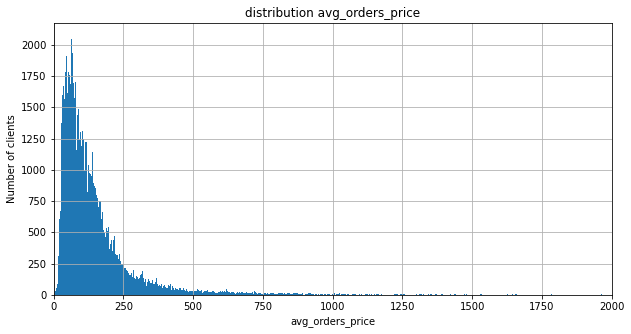

In [48]:
f, ax = plt.subplots(figsize=(10,5))
plt.title('distribution avg_orders_price')
plt.xlabel('avg_orders_price')
plt.ylabel('Number of clients')
ax = customers_clustering_df.avg_orders_price.hist(bins=5000)
plt.xlim(0,2000)

(0.0, 5.0)

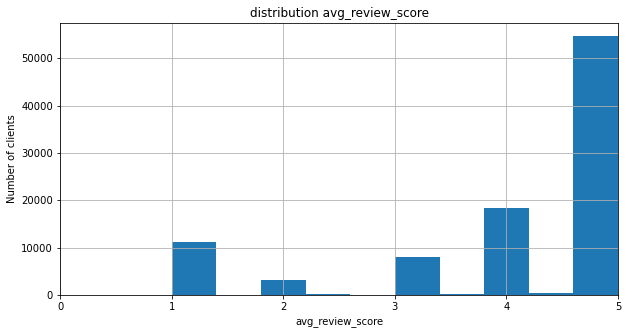

In [49]:
f, ax = plt.subplots(figsize=(10,5))
plt.title('distribution avg_review_score')
plt.xlabel('avg_review_score')
plt.ylabel('Number of clients')
ax = customers_clustering_df.avg_review_score.hist(bins=10)
plt.xlim(0,5)

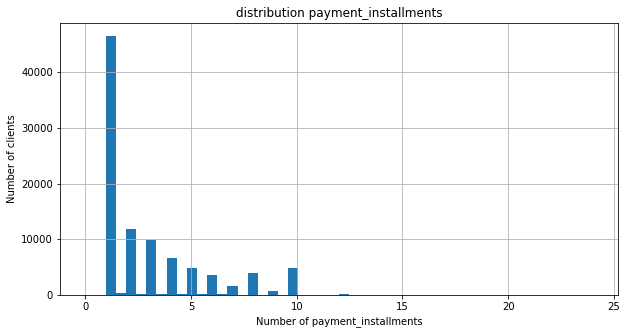

In [50]:
f, ax = plt.subplots(figsize=(10,5))
plt.title('distribution payment_installments')
plt.xlabel('Number of payment_installments')
plt.ylabel('Number of clients')
ax = customers_clustering_df.payment_installments.hist(bins=50)

(0.0, 5.0)

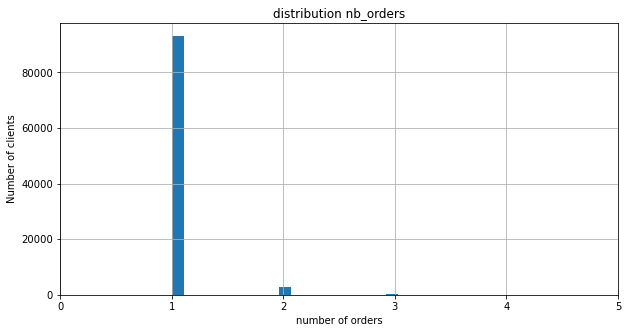

In [51]:
f, ax = plt.subplots(figsize=(10,5))
plt.title('distribution nb_orders')
plt.xlabel('number of orders')
plt.ylabel('Number of clients')
ax = customers_clustering_df.nb_orders.hist(bins=150)
plt.xlim(0,5)

(0.0, 5.0)

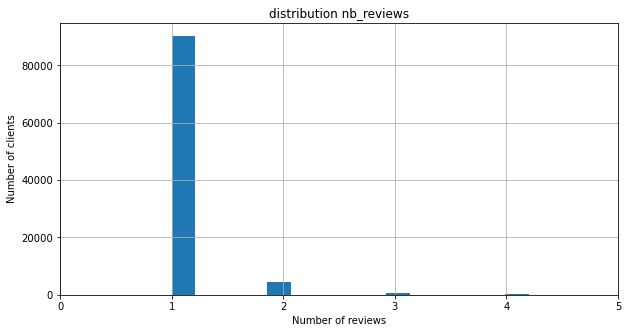

In [52]:
f, ax = plt.subplots(figsize=(10,5))
plt.title('distribution nb_reviews')
plt.xlabel('Number of reviews')
plt.ylabel('Number of clients')
ax = customers_clustering_df.nb_reviews.hist(bins=150)
plt.xlim(0,5)

Nous remarquons que la plupart des clients n'ont effectué qu'une seule commandes et laissé qu'un seul avis, nous décidons donc de retirer le nombre d'avis et de commande pour notre clustering.

In [53]:
customers_clustering_df = customers_clustering_df.drop(['nb_reviews','nb_orders'], axis = 1)
customers_clustering_df.head()

,avg_orders_price,avg_review_score,payment_installments,recency_order,_agro_industry_and_commerce,_air_conditioning,_art,_arts_and_craftmanship,_audio,_auto,...,_security_and_services,_signaling_and_security,_small_appliances,_small_appliances_home_oven_and_coffee,_sports_leisure,_stationery,_tablets_printing_image,_telephony,_toys,_watches_gifts
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,5.0,8.0,2018-05-10 11:11:18,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,4.0,1.0,2018-05-07 18:25:44,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,86.22,3.0,8.0,2017-03-10 21:05:03,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,43.62,4.0,4.0,2017-10-12 20:49:17,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,196.89,5.0,6.0,2017-11-14 20:06:52,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Feature Engineering
Nous allons regarder de plus près les catégories de produit, et ainsi observer lesquelles sont les plus demandées. L'objectif ici sera d'attribuer à chaque client une catégorie principale. 

In [54]:
cat_name = products_orders_2.product_category_name_english.unique()
name = []
nb_products_sold = []

for cat in cat_name :
    name.append(cat)
    nb_products_sold.append(products_orders_2.product_category_name_english.loc[products_orders_2.product_category_name_english == cat].count())

cat_df = pd.DataFrame({'product_category_name_english' : name,
                      'nb_products_sold' : nb_products_sold})
cat_df.sort_values(by = 'nb_products_sold', ascending=False).reset_index(drop=True).head()

,product_category_name_english,nb_products_sold
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827


In [55]:
CA_category = products_orders_2[['order_id','price','product_category_name_english']].groupby(['product_category_name_english']).sum()
CA_category_ordered = CA_category.sort_values(by='price', ascending=False)
CA_category_ordered.rename(columns = {'price':'CA','product_category_name_english':'category_name'}, inplace = True)
CA_category_ordered.head()

,CA
product_category_name_english,
health_beauty,1258681.34
watches_gifts,1205005.68
bed_bath_table,1036988.68
sports_leisure,988048.97
computers_accessories,911954.32


In [56]:
categories_score = cat_df.merge(CA_category_ordered, on='product_category_name_english', how='left')
print(categories_score.shape)
cat_score = categories_score.sort_values(by = 'CA', ascending=False).reset_index(drop=True)
cat_score.head()

(72, 3)


,product_category_name_english,nb_products_sold,CA
0,health_beauty,9670,1258681.34
1,watches_gifts,5991,1205005.68
2,bed_bath_table,11115,1036988.68
3,sports_leisure,8641,988048.97
4,computers_accessories,7827,911954.32


In [57]:
cat_score['cat_score'] = (cat_score.CA/100).round(0)
cat_score.head()

,product_category_name_english,nb_products_sold,CA,cat_score
0,health_beauty,9670,1258681.34,12587.0
1,watches_gifts,5991,1205005.68,12050.0
2,bed_bath_table,11115,1036988.68,10370.0
3,sports_leisure,8641,988048.97,9880.0
4,computers_accessories,7827,911954.32,9120.0


Nous allons créer une vouvelles variable contenant la catégorie primaire de chaque client qui représente la catégorie de produit la plus achetée par chacun. 

In [58]:
customers_clustering_df['primary_product_cat'] = customers_clustering_df.iloc[:,4:].idxmax(axis=1)

In [59]:
customers_clustering_df['primary_product_cat'] = customers_clustering_df['primary_product_cat'].apply(lambda x : x[1:] if x.startswith("_") else x)
customers_clustering_df.rename(columns = {'primary_product_cat':'product_category_name_english'}, inplace = True)
customers_clustering_df.head()

,avg_orders_price,avg_review_score,payment_installments,recency_order,_agro_industry_and_commerce,_air_conditioning,_art,_arts_and_craftmanship,_audio,_auto,...,_signaling_and_security,_small_appliances,_small_appliances_home_oven_and_coffee,_sports_leisure,_stationery,_tablets_printing_image,_telephony,_toys,_watches_gifts,product_category_name_english
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,5.0,8.0,2018-05-10 11:11:18,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bed_bath_table
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,4.0,1.0,2018-05-07 18:25:44,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,health_beauty
0000f46a3911fa3c0805444483337064,86.22,3.0,8.0,2017-03-10 21:05:03,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,stationery
0000f6ccb0745a6a4b88665a16c9f078,43.62,4.0,4.0,2017-10-12 20:49:17,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,telephony
0004aac84e0df4da2b147fca70cf8255,196.89,5.0,6.0,2017-11-14 20:06:52,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,telephony


In [60]:
for col in customers_clustering_df.columns:
    if col.startswith('_')==True :
        customers_clustering_df = customers_clustering_df.drop(col,axis=1)

customers_clustering_df

,avg_orders_price,avg_review_score,payment_installments,recency_order,product_category_name_english
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,5.0,8.0,2018-05-10 11:11:18,bed_bath_table
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,4.0,1.0,2018-05-07 18:25:44,health_beauty
0000f46a3911fa3c0805444483337064,86.22,3.0,8.0,2017-03-10 21:05:03,stationery
0000f6ccb0745a6a4b88665a16c9f078,43.62,4.0,4.0,2017-10-12 20:49:17,telephony
0004aac84e0df4da2b147fca70cf8255,196.89,5.0,6.0,2017-11-14 20:06:52,telephony
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,5.0,10.0,2017-06-08 21:15:16,health_beauty
fffea47cd6d3cc0a88bd621562a9d061,84.58,4.0,1.0,2017-12-10 20:16:20,baby
ffff371b4d645b6ecea244b27531430a,112.46,5.0,1.0,2017-02-07 16:02:44,auto


In [61]:
customers_clustering_final = customers_clustering_df.merge(cat_score[['product_category_name_english','cat_score']], on='product_category_name_english', how='left')
customers_clustering_final

,avg_orders_price,avg_review_score,payment_installments,recency_order,product_category_name_english,cat_score
0,141.90,5.0,8.0,2018-05-10 11:11:18,bed_bath_table,10370.0
1,27.19,4.0,1.0,2018-05-07 18:25:44,health_beauty,12587.0
2,86.22,3.0,8.0,2017-03-10 21:05:03,stationery,2309.0
3,43.62,4.0,4.0,2017-10-12 20:49:17,telephony,3237.0
4,196.89,5.0,6.0,2017-11-14 20:06:52,telephony,3237.0
...,...,...,...,...,...,...
96091,2067.42,5.0,10.0,2017-06-08 21:15:16,health_beauty,12587.0
96092,84.58,4.0,1.0,2017-12-10 20:16:20,baby,4118.0
96093,112.46,5.0,1.0,2017-02-07 16:02:44,auto,5927.0
96094,133.69,5.0,5.0,2018-05-02 15:58:47,watches_gifts,12050.0


In [62]:
customers_clustering_final['today'] = pd.Timestamp.today().normalize()
customers_clustering_final.head()

,avg_orders_price,avg_review_score,payment_installments,recency_order,product_category_name_english,cat_score,today
0,141.90,5.0,8.0,2018-05-10 11:11:18,bed_bath_table,10370.0,2021-07-20
1,27.19,4.0,1.0,2018-05-07 18:25:44,health_beauty,12587.0,2021-07-20
2,86.22,3.0,8.0,2017-03-10 21:05:03,stationery,2309.0,2021-07-20
3,43.62,4.0,4.0,2017-10-12 20:49:17,telephony,3237.0,2021-07-20
4,196.89,5.0,6.0,2017-11-14 20:06:52,telephony,3237.0,2021-07-20


In [63]:
customers_clustering_final['recency_order'] = pd.to_datetime(customers_clustering_final['recency_order']).dt.normalize()

In [64]:
customers_clustering_final['last_order'] = customers_clustering_final['today'] - customers_clustering_final['recency_order']
customers_clustering_final['last_order'] = customers_clustering_final['last_order']/np.timedelta64(1,'D')

customers_clustering_final.sort_values(by='last_order').head()

,avg_orders_price,avg_review_score,payment_installments,recency_order,product_category_name_english,cat_score,today,last_order
95757,166.46,1.0,3.5,2018-09-03,kitchen_dining_laundry_garden_furniture,463.0,2021-07-20,1051.0
34825,510.96,5.0,8.0,2018-08-29,kitchen_dining_laundry_garden_furniture,463.0,2021-07-20,1056.0
68797,33.23,3.0,1.0,2018-08-29,party_supplies,45.0,2021-07-20,1056.0
66111,497.25,5.0,2.0,2018-08-29,health_beauty,12587.0,2021-07-20,1056.0
6157,32.23,4.5,1.5,2018-08-29,electronics,1602.0,2021-07-20,1056.0


Nous observons que par rapport au jour où est conduite cette analyse les commandes datent d'entre 1040 et 1750 jours. Afin de prétendre que nous avanos des données récentes de clients, nous allons retirer 1040 jours à toutes des dates de dernière commande.

In [65]:
customers_clustering_final.last_order = customers_clustering_final.last_order - 1040

In [66]:
customers_clustering_final.head()

,avg_orders_price,avg_review_score,payment_installments,recency_order,product_category_name_english,cat_score,today,last_order
0,141.90,5.0,8.0,2018-05-10,bed_bath_table,10370.0,2021-07-20,127.0
1,27.19,4.0,1.0,2018-05-07,health_beauty,12587.0,2021-07-20,130.0
2,86.22,3.0,8.0,2017-03-10,stationery,2309.0,2021-07-20,553.0
3,43.62,4.0,4.0,2017-10-12,telephony,3237.0,2021-07-20,337.0
4,196.89,5.0,6.0,2017-11-14,telephony,3237.0,2021-07-20,304.0


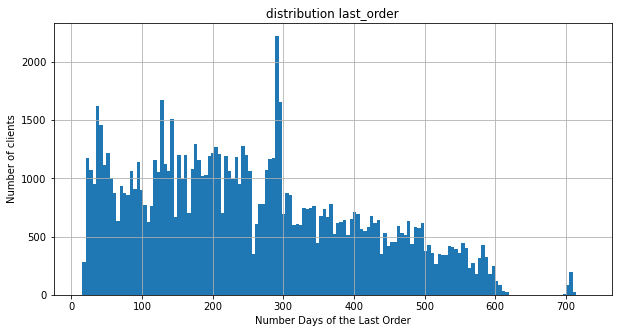

In [67]:
f, ax = plt.subplots(figsize=(10,5))
plt.title('distribution last_order')
plt.xlabel('Number Days of the Last Order')
plt.ylabel('Number of clients')
ax = customers_clustering_final.last_order.hist(bins=150)

In [68]:
customers_clustering_to_csv = customers_clustering_final.drop(['product_category_name_english','recency_order','today'], axis=1)
print(customers_clustering_to_csv.shape)
customers_clustering_to_csv.head()

(96096, 5)


,avg_orders_price,avg_review_score,payment_installments,cat_score,last_order
0,141.90,5.0,8.0,10370.0,127.0
1,27.19,4.0,1.0,12587.0,130.0
2,86.22,3.0,8.0,2309.0,553.0
3,43.62,4.0,4.0,3237.0,337.0
4,196.89,5.0,6.0,3237.0,304.0


In [69]:
customers_clustering_to_csv.to_csv('customers_clustering_df.csv')